In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


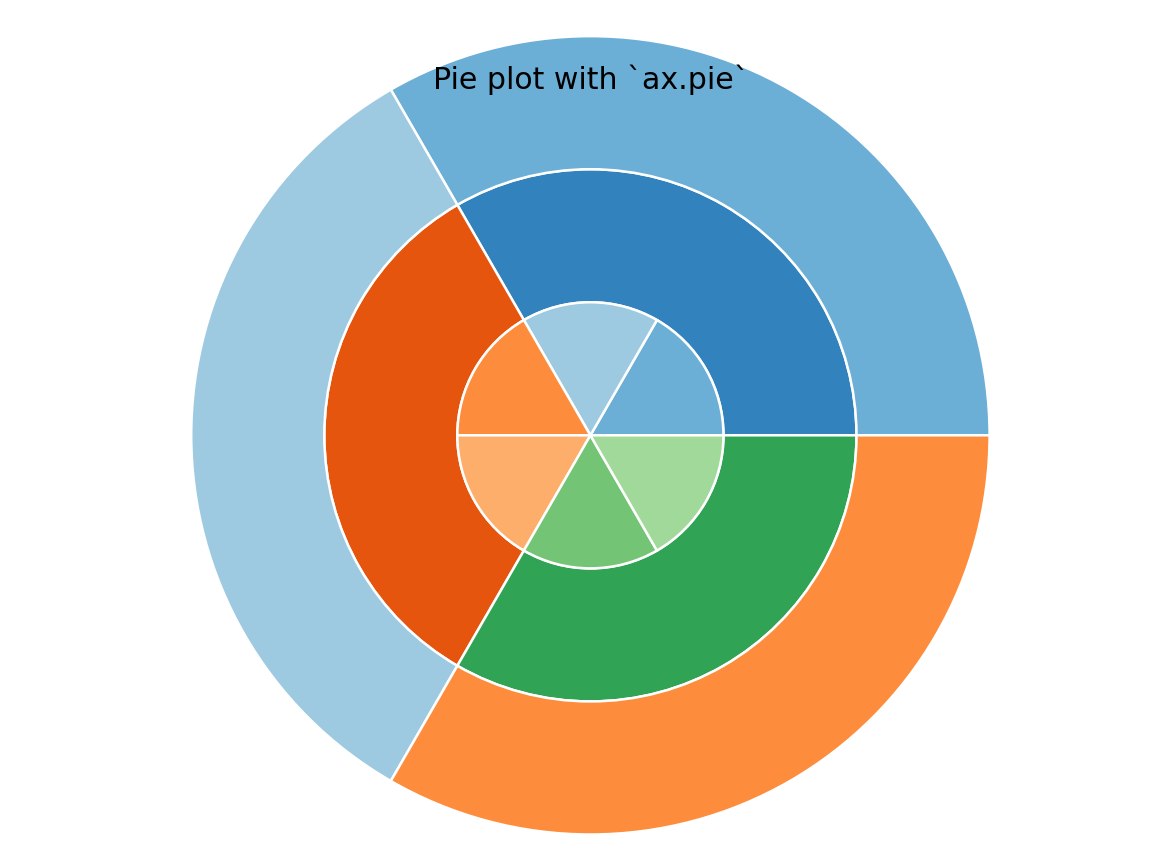

In [34]:
fig, ax = plt.subplots()

size = 0.5
vals = np.array([[30., 30.], [30., 30.], [30., 30.]])

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(4)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.sum(axis=1), radius=1+size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [158]:
import glob

Sim_number = []
Pressures = []
Mol_frac = []
Simulation = glob.glob('Mol_Fraction_variation/O2*/*_bar/Sim_*')
for i in np.arange(len(Simulation)):
    Sim_number.append(Simulation[i][23:])
    Pressures.append(Simulation[i].rsplit('/',1)[0][23:])
    Mol_frac.append(Simulation[i].rsplit('/',1)[0].rsplit('/',1)[0][23:])
    
    
df = pd.DataFrame(np.array([Mol_frac,Pressures,Sim_number,np.ones(len(Sim_number))]).T)
df.columns = ['Mol_frac', 'Pressure', 'Sim_number','Occurence']
df["Occurence"] = pd.to_numeric(df["Occurence"])
df

,Mol_frac,Pressure,Sim_number,Occurence
0,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_25_B_0,1.0
1,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_75_B_25,1.0
2,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_0_B_25,1.0
3,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_0_B_100,1.0
4,O2_0.5_CO_0.5_CO2_0.0,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar,O2_0.5_CO_0.5_CO2_0.0/1e-06_bar/Sim_A_50_B_50,1.0
...,...,...,...,...
265,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,O2_1.0_CO_0.0_CO2_0.0/10.0_bar/Sim_A_0_B_75,1.0
266,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,O2_1.0_CO_0.0_CO2_0.0/10.0_bar/Sim_A_75_B_0,1.0
267,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,O2_1.0_CO_0.0_CO2_0.0/10.0_bar/Sim_A_50_B_25,1.0
268,O2_1.0_CO_0.0_CO2_0.0,O2_1.0_CO_0.0_CO2_0.0/10.0_bar,O2_1.0_CO_0.0_CO2_0.0/10.0_bar/Sim_A_0_B_50,1.0


In [180]:
inner = df.groupby('Mol_frac').sum()
middle = df.groupby(['Mol_frac','Pressure']).sum()
outer = df.groupby(['Sim_number','Pressure','Mol_frac']).sum()

In [181]:
middle.values[:,1]

array([15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0,
       15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0], dtype=object)

In [191]:
inner.index

Index(['O2_0.0_CO_1.0_CO2_0.0', 'O2_0.5_CO_0.5_CO2_0.0',
       'O2_1.0_CO_0.0_CO2_0.0'],
      dtype='object', name='Mol_frac')

<IPython.core.display.Javascript object>


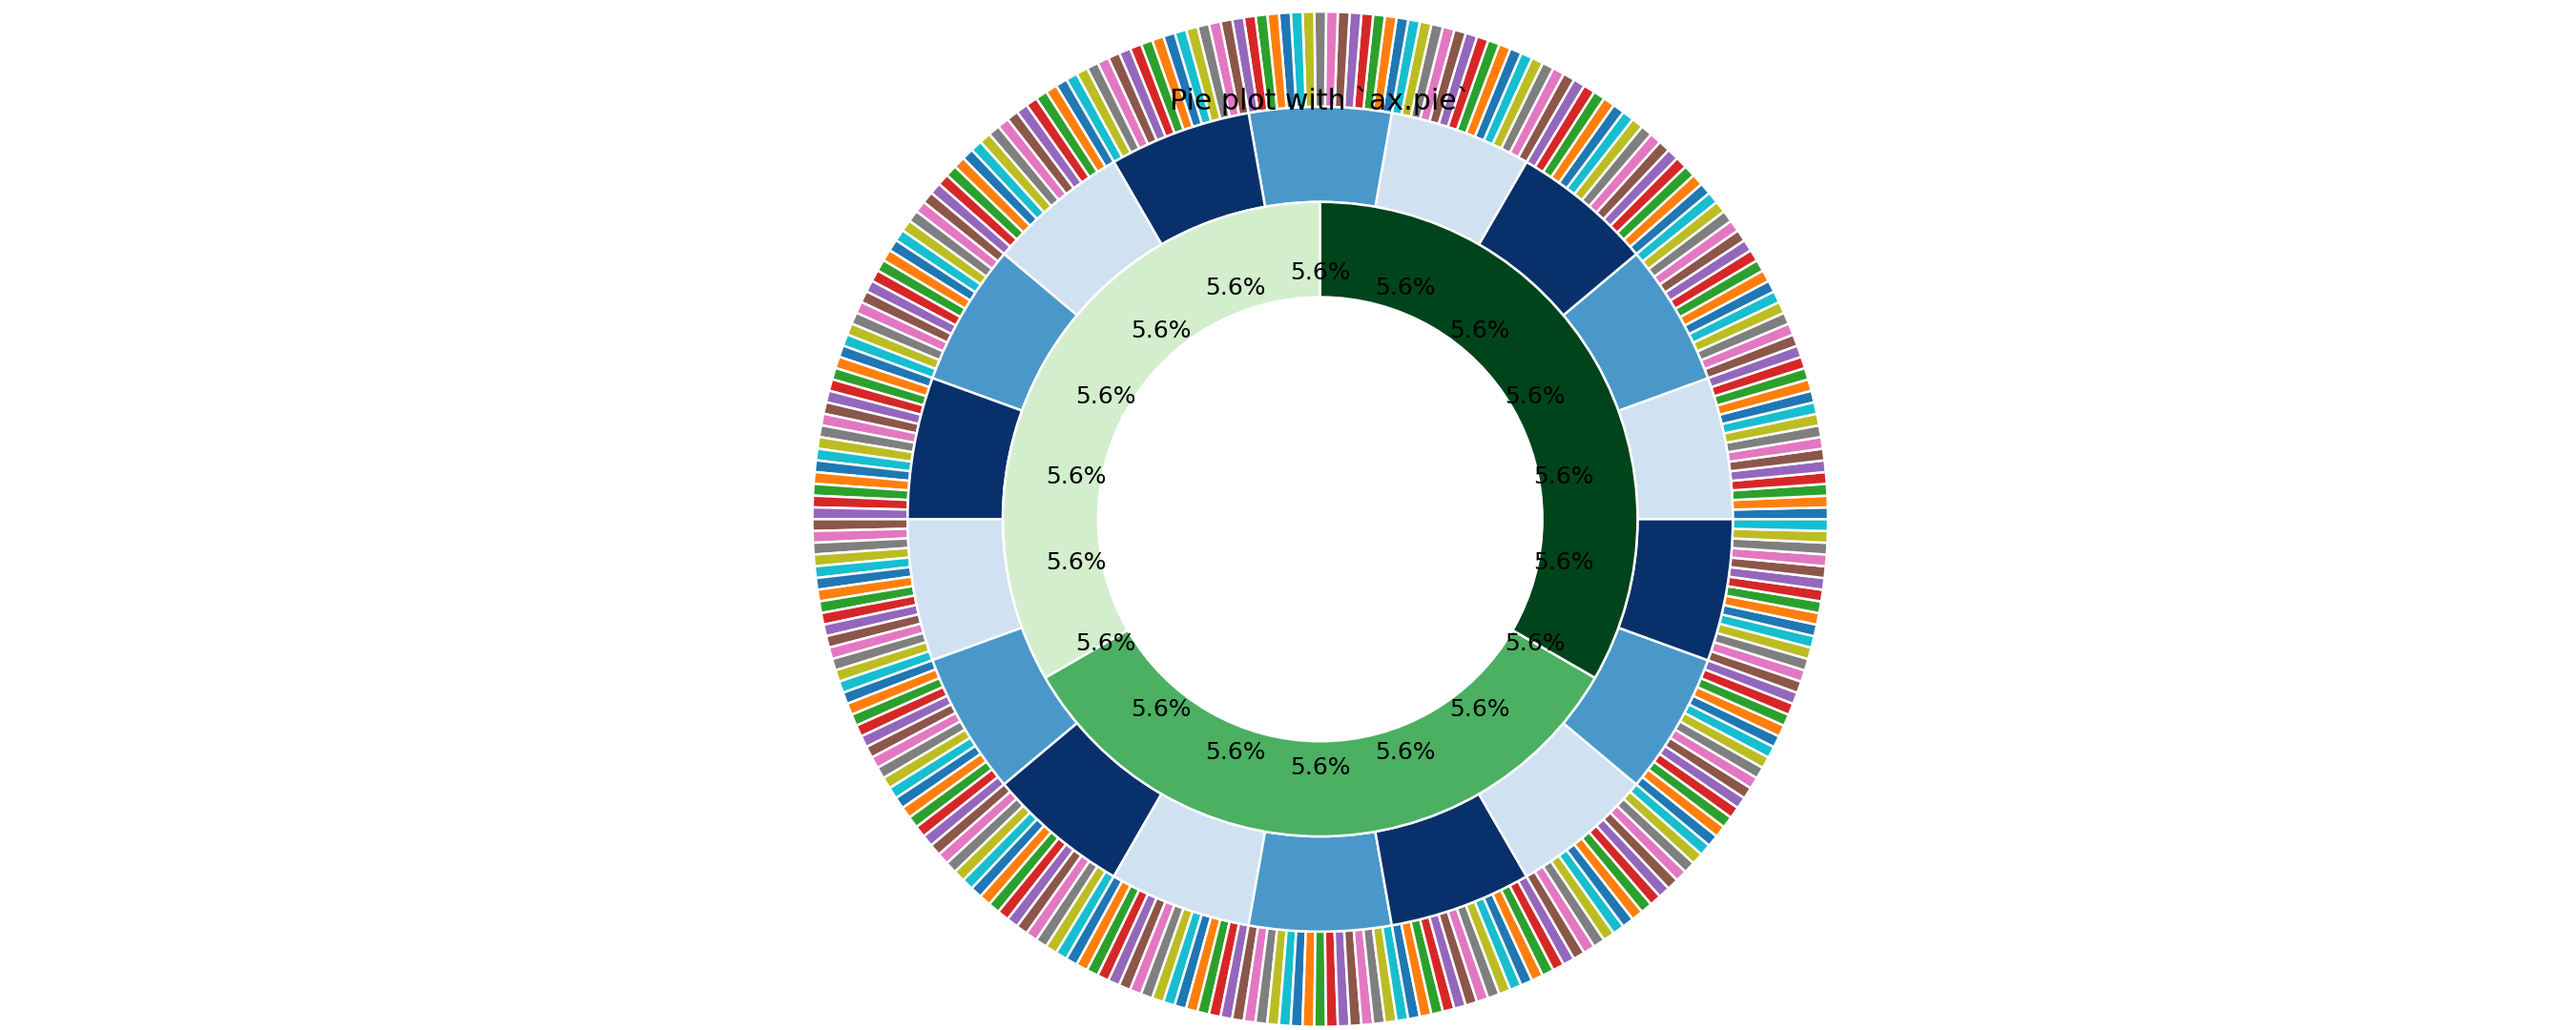

In [205]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

import numpy as np

fig, ax = plt.subplots(figsize=(15,6))
size = 0.3

shades_of_green = plt.cm.Greens(np.linspace(0.2, 1, len(inner.index)))
shades_of_blue = plt.cm.Blues(np.linspace(0.2, 1, len(inner.index)))


ax.pie(outer.values.flatten(), radius=1+(2*size), 
#        labels = inner.index,
#        colors=shades_of_blue,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(middle.values[:,1].astype(float).flatten(), radius=1+size,
#        labels=middle.index,
       colors=shades_of_blue,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

wedges, texts, autotexts = ax.pie(inner.values[:,2].astype(float).flatten(), radius=1,
#        labels=inner.index,
       colors=shades_of_green,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

# Add labels inside the slices with curved text
for text, wedge in zip(texts, wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    x = x * 0.5  # Adjust the position inside the slice

    # Curved text effect
    text.set_path_effects([withStroke(linewidth=3, foreground='black')])

    text.set_position((x, y))
    text.set_rotation(ang)  # Rotate the text to match the slice
    text.set_clip_on(True)

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

<IPython.core.display.Javascript object>


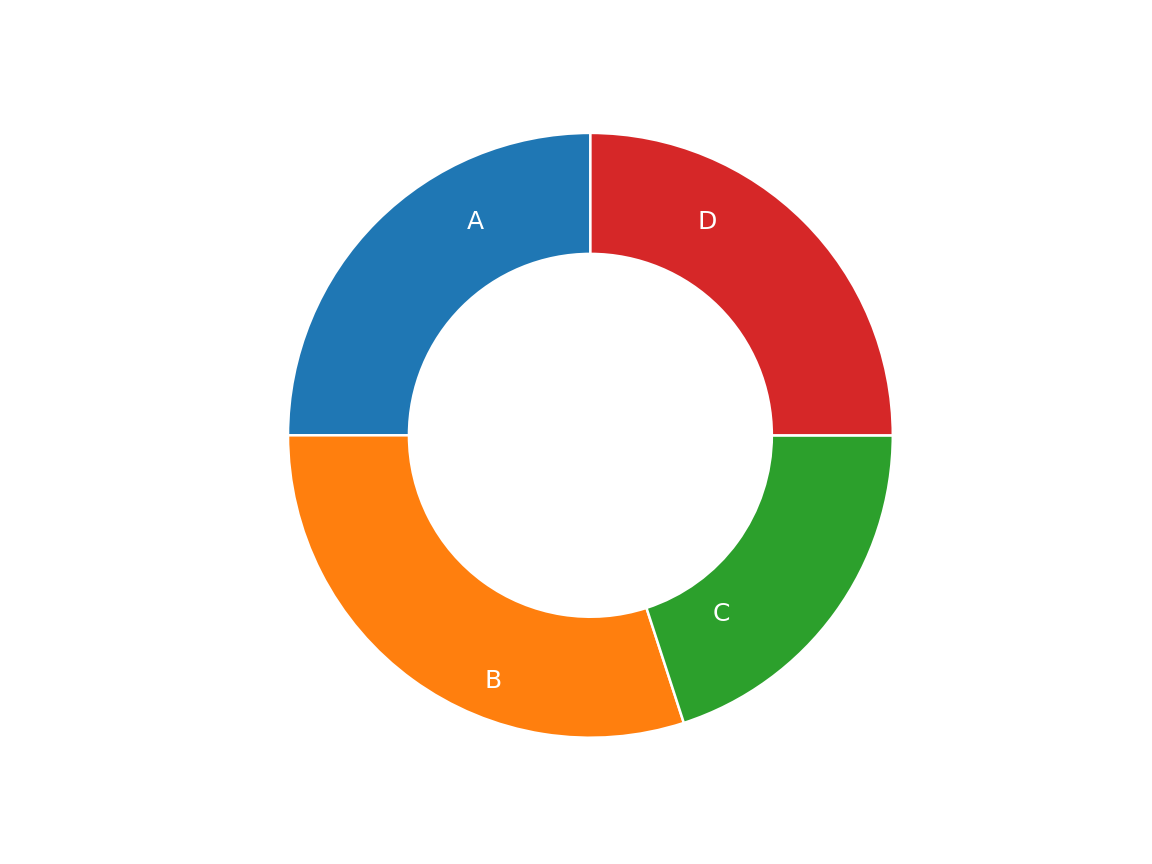

In [213]:
import matplotlib.pyplot as plt

# Sample data
labels = ['A', 'B', 'C', 'D']
sizes = [25, 30, 20, 25]

# Create a pie chart with labels inside the slices
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='', startangle=90,
                                  wedgeprops=dict(width=0.4, edgecolor='w'), textprops=dict(color="w"))

# Add labels inside the slices
for text, wedge in zip(texts, wedges):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x, y = np.cos(np.deg2rad(ang)), np.sin(np.deg2rad(ang))
    x = x * 0.5  # Adjust the position inside the slice
    text.set_position((x, y))
    text.set_clip_on(True)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the plot
plt.show()


In [217]:
folder_paths

[['/root', '/root/documents', '/root/documents/reports'],
 ['/root', '/root/pictures', '/root/pictures/vacation', '/root/pictures/work'],
 ['/root', '/root/music', '/root/music/albums', '/root/music/playlists']]

<IPython.core.display.Javascript object>


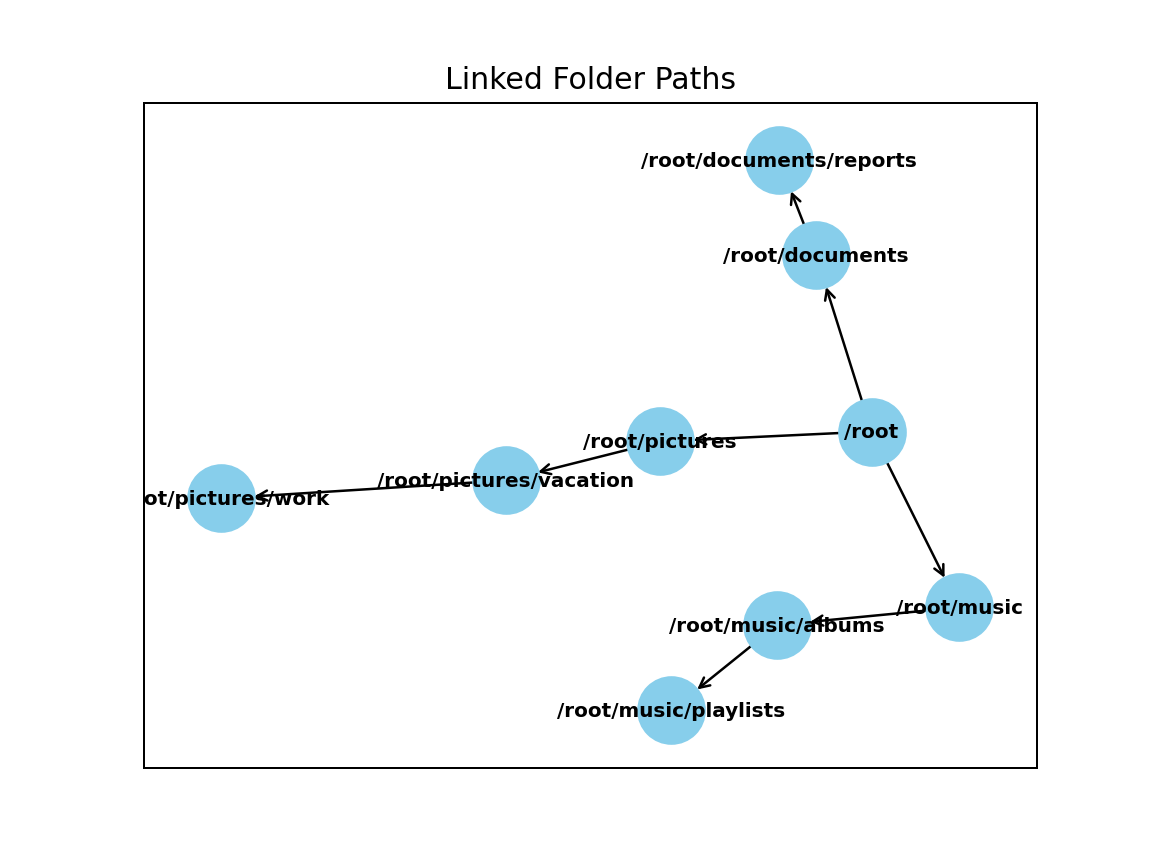

In [212]:
import matplotlib.pyplot as plt
import networkx as nx

def add_path_edges(graph, path):
    for i in range(len(path) - 1):
        graph.add_edge(path[i], path[i + 1])

# Sample folder paths
folder_paths = [
    ['/root', '/root/documents', '/root/documents/reports'],
    ['/root', '/root/pictures', '/root/pictures/vacation', '/root/pictures/work'],
    ['/root', '/root/music', '/root/music/albums', '/root/music/playlists'],
]

# Create a directed graph
G = nx.DiGraph()

# Add edges for each folder path
for path in folder_paths:
    add_path_edges(G, path)

plt.figure()
# Plot the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw_networkx(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", arrowsize=10, arrowstyle="->")

# Customize the plot

plt.title("Linked Folder Paths")
plt.show()
